In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [2]:
mnist = pd.read_csv("sample_data/mnist_train_small.csv")
x = mnist[mnist.columns.difference(["6"])]
y = mnist["6"]
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)


In [3]:
model = RandomForestRegressor(50, max_depth=15, max_features=15)
model.fit(x_train, y_train)
print(model.score(x_val, y_val))

0.8218630557168625


In [4]:
model2 = XGBClassifier(objective='multiclass:softmax', learning_rate = 0.1,
              max_depth = 1, n_estimators = 330)
model2.fit(x_train, y_train)
preds = model2.predict(x_test)
print(sum(preds==y_test)/len(y_test))

0.88825


ValueError: ignored

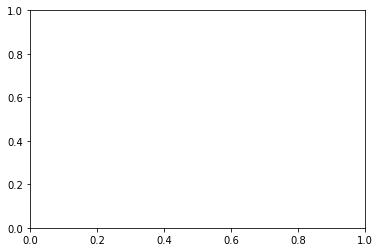

In [6]:
plot_tree(model, num_trees=3)